# 02 — Neural networks as layered models

A **neural network** is just a **function built by composing simple layers**.

For a small fully connected network (multi-layer perceptron, MLP), we can write:

\begin{aligned}
x \in \mathbb{R}^d \\
h_1 = \sigma(W_1 x + b_1) \\
h_2 = \sigma(W_2 h_1 + b_2) \\
\vdots \\
\hat{y} = g(W_L h_{L-1} + b_L),
\end{aligned}

where:
- each $W_l$ is a matrix of weights,
- each $b_l$ is a bias vector,
- $\sigma$ and $g$ are nonlinear activation functions.

The key idea:
- Each layer computes a simple transformation.
- Stacking layers lets the network represent very **flexible, nonlinear functions**.

In classification, the network outputs a **score for each class**.  
We train it by minimizing a **loss**, typically the **cross-entropy loss**, which corresponds to (negative) log-likelihood for a categorical distribution.

We won't derive the full training algorithm here (gradient descent + backpropagation), but we will use an off-the-shelf implementation (`MLPClassifier`) to see what neural networks *do*.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report

rng = np.random.default_rng(1)

plt.rcParams["figure.figsize"] = (6, 4)
plt.rcParams["axes.grid"] = True

X shape: (1000, 2)
y shape: (1000,)


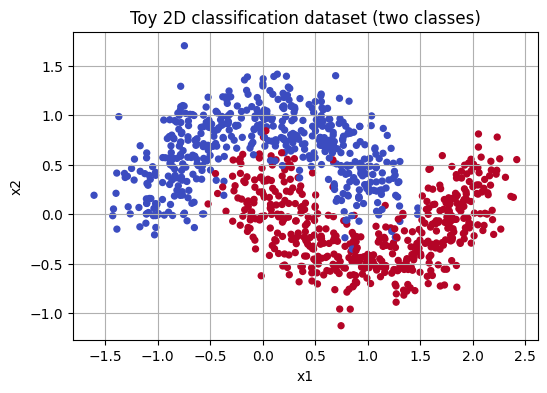

In [2]:
from sklearn.datasets import make_moons

# N samples from a 2D "moons" dataset (two interleaving half circles)
N = 1000
X, y = make_moons(n_samples=N, noise=0.2, random_state=1)

print("X shape:", X.shape)
print("y shape:", y.shape)
np.unique(y, return_counts=True)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", s=18)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Toy 2D classification dataset (two classes)")
plt.show()

In [3]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)

print("Training size:", X_train.shape[0])
print("Validation size:", X_val.shape[0])

Training size: 700
Validation size: 300


In [4]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(20, activation="tanh", input_shape=(2,)),
    Dense(20, activation="tanh"),
    Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100
)

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7657 - loss: 0.6040 - val_accuracy: 0.7833 - val_loss: 0.5541
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8043 - loss: 0.4857 - val_accuracy: 0.7867 - val_loss: 0.4718
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8157 - loss: 0.4143 - val_accuracy: 0.7967 - val_loss: 0.4191
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8200 - loss: 0.3688 - val_accuracy: 0.8133 - val_loss: 0.3872
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8386 - loss: 0.3413 - val_accuracy: 0.8233 - val_loss: 0.3672
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8457 - loss: 0.3227 - val_accuracy: 0.8300 - val_loss: 0.3542
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8629 - loss: 0.3101 - val_accuracy: 0.8433 - val_loss: 0.3450
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8743 - loss: 0.3008 - val_accuracy: 0.8500 - val_loss: 0.3

In [6]:
# Probabilities from the NN (shape: (N, 1))
y_train_proba = model.predict(X_train)
y_val_proba   = model.predict(X_val)

# Convert to hard class labels 0/1
y_train_pred = (y_train_proba > 0.5).astype(int).ravel()
y_val_pred   = (y_val_proba > 0.5).astype(int).ravel()

acc_train = accuracy_score(y_train, y_train_pred)
acc_val   = accuracy_score(y_val, y_val_pred)

print(f"NN accuracy (train): {acc_train:.3f}")
print(f"NN accuracy (val)  : {acc_val:.3f}")

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step
NN accuracy (train): 0.940
NN accuracy (val)  : 0.913


In [7]:
def plot_decision_boundary(model, X, y, title="Decision boundary"):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300),
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    #For Keras: get probabilities and threshold
    proba = model.predict(grid)
    zz = (proba > 0.5).astype(int).ravel()
    zz = zz.reshape(xx.shape)
    
    plt.contourf(xx, yy, zz, alpha=0.25, cmap="coolwarm")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", s=18, edgecolor="k", linewidth=0.3)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title)
    plt.show()

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 0s 168us/step


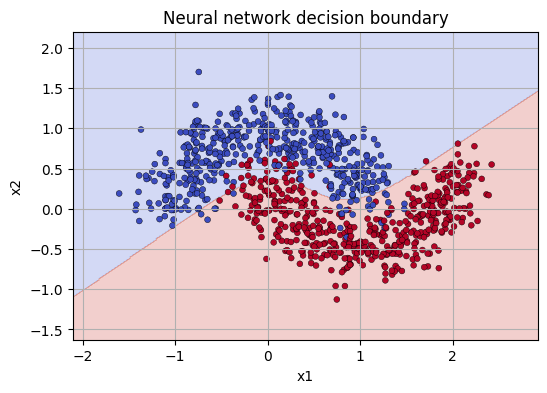

In [8]:
plot_decision_boundary(model, X, y, title="Neural network decision boundary")

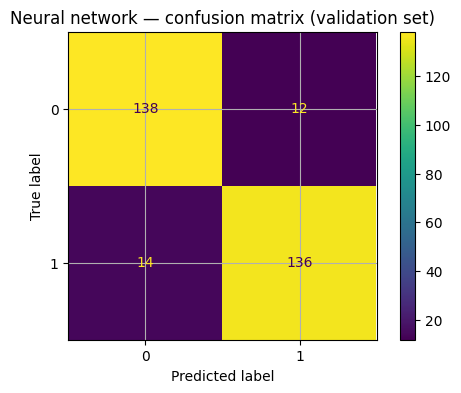

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_mlp = confusion_matrix(y_val, y_val_pred)
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp)
disp_mlp.plot()
plt.title("Neural network — confusion matrix (validation set)")
plt.show()

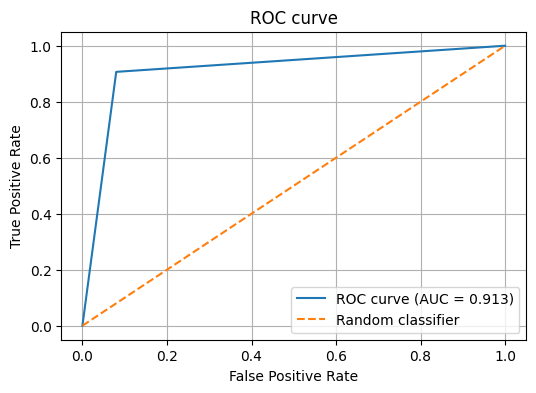

AUC: 0.9133333333333334


In [10]:
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, roc_auc_score
)

fpr, tpr, roc_thresholds = roc_curve(y_val, y_val_pred)
auc = roc_auc_score(y_val, y_val_pred)

plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], "--", label="Random classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.legend()
plt.show()

print("AUC:", auc)

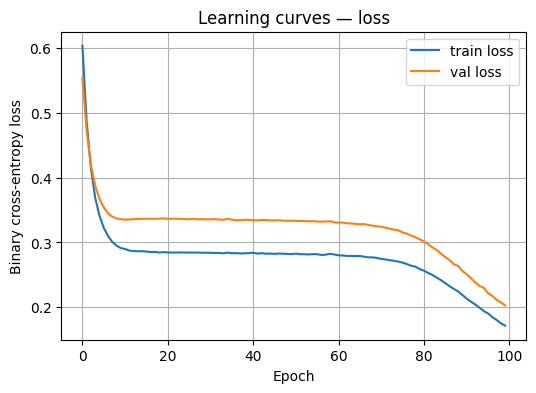

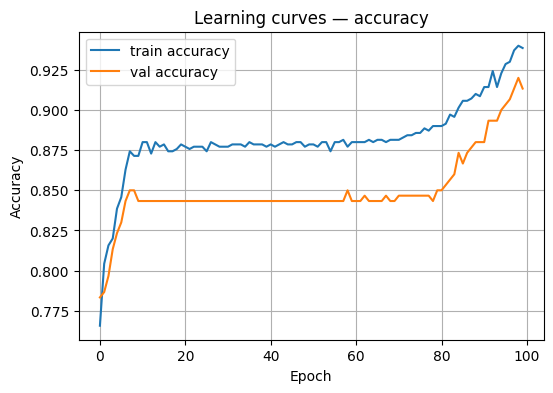

In [11]:
#Loss curves
plt.figure()
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.xlabel("Epoch")
plt.ylabel("Binary cross-entropy loss")
plt.title("Learning curves — loss")
plt.legend()
plt.show()

#Accuracy curves
plt.figure()
plt.plot(history.history["accuracy"], label="train accuracy")
plt.plot(history.history["val_accuracy"], label="val accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Learning curves — accuracy")
plt.legend()
plt.show()

## Comparing linear and neural network classifiers

We have trained:

- a **linear classifier** (logistic regression),
- a **neural network** with two hidden layers.

We can summarize:

- The **linear model** can only draw (roughly) a straight line to separate classes.
- The **neural network** can learn **curved, nonlinear decision boundaries**, which are better suited to our "moons" dataset.

We also compared:

- **Training accuracy**: how well the model fits the training data.
- **Validation accuracy**: how well the model generalizes to unseen data.

Possible outcomes:

- If training accuracy is high but validation accuracy is much lower:
  - the model is **overfitting** (memorizing the training data, not learning general structure).
- If both are low:
  - the model is **underfitting** (too simple / not enough capacity).
- If both are reasonably high and close to each other:
  - good **generalization**.

In our small example, the neural network should generally:
- fit the decision boundary better than the linear model,
- ideally achieve higher validation accuracy,
- but it also has **more capacity**, so it can overfit if not regularized.
